# Introduction to Data Visualization

This project provides basic intro to different types of plots. The project uses an immigration dataset which is provided within the repo folder. Following you will find explanation to each type of graphs and practical implementation. You will also find many questions which you can try to solve and plot out the results.

Basic knowledge of pandas library is required and you will learn plotting graphs using matplotlib.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Text(0.5, 1.0, 'plot')

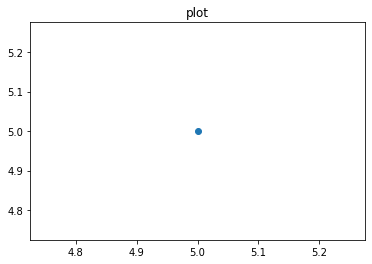

In [2]:
plt.plot(5,5,'o')
plt.title('plot')

Little warmup

In [3]:
data = {'year':[1981,1982,1983,1984],
        'Medals':[5,6,7,8]}
df = pd.DataFrame(data,columns=['year','Medals'])

In [4]:
df

,year,Medals
0,1981,5
1,1982,6
2,1983,7
3,1984,8


In [5]:
df.dtypes

year      int64
Medals    int64
dtype: object

In [6]:
df['year'] = df['year'].astype("float")
df['Medals'] = df['Medals'].astype("float")

In [7]:
df.dtypes

year      float64
Medals    float64
dtype: object

<AxesSubplot:xlabel='year'>

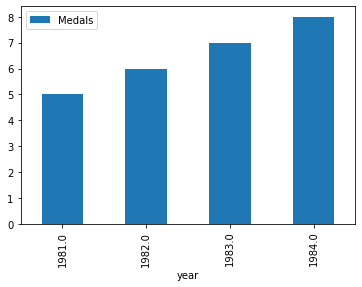

In [8]:
df.plot(kind='bar',
       x = 'year',
       y = 'Medals')

In [9]:
!pip install xlrd


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# loading dataset

Configure the path according to your directory structure

In [16]:
df_can = pd.read_excel("data visualisation/Immigration dataset.xlsx",
                       sheet_name = "Canada by Citizenship",
                       skiprows = range(20),
                      skipfooter = 2)

In [17]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [18]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [19]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [20]:
df_can['Total'] = df_can.sum(axis=1)

C:\Users\NISHAN~1\AppData\Local\Temp/ipykernel_18920/552165185.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [21]:
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [22]:
df_can.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

The default index of the dataset is a numeric range from 0 to 194. This makes it very difficult to do a query by a specific country. For example to search for data on Japan, we need to know the corresponding index value.

This can be fixed very easily by setting the 'Country' column as the index using set_index() method.

In [23]:
df_can.set_index('Country',inplace=True)

In [24]:
df_can.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [25]:
df_can.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [26]:
#for years 1980 to 1985
df_can[df_can.index=='Japan']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [27]:
df_can.loc['Japan',[1980,1981,1982,1983,1984,1985]]

1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object

Column names that are integers (such as the years) might introduce some confusion. For example, when we are referencing the year 2013, one might confuse that when the 2013th positional index.

To avoid this ambuigity, let's convert the column names into strings: '1980' to '2013'

In [28]:
df_can.columns = list(map(str, df_can.columns))
type(df_can.columns.values)

numpy.ndarray

In [ ]:
condition = df_can['Continent']=='Asia'
print(condition)
df_can[condition]

In [30]:
print('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (195, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


# Let's start with a case study:

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and aout three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti. We can quickly visualize this effort using a Line plot:

Question: Plot a line graph of immigration from Haiti using df.plot().

In [31]:
df_can.loc['Haiti','Total']

84813

In [32]:
years = list(map(str, range(1980, 2014)))
haiti = df_can.loc['Haiti',years]
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

pandas automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). However, notice how the years were not displayed because they are of type string. Therefore, let's change the type of the index values to integer for plotting.

Also, let's label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() as follows:

In [33]:
haiti.index = haiti.index.map(int)  #converting indexes from string to int

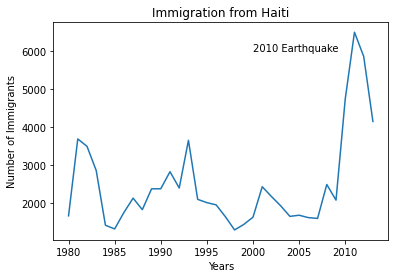

In [34]:
haiti.plot(kind = 'line')

plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.text(2000, 6000, '2010 Earthquake')
plt.show()

Question: Let's compare the number of immigrants from India and China from 1980 to 2013.

In [53]:
compare = df_can.loc[['China', 'India'],years]

In [55]:
compare = compare.transpose()

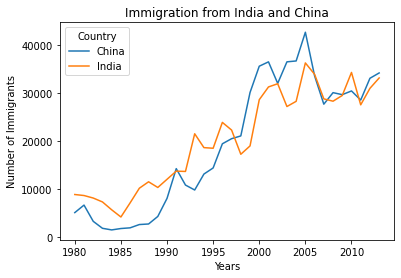

In [58]:
compare.plot(kind = 'line')

plt.title('Immigration from India and China')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

Question: Compare the trend of top 5 countries that contributed the most to immigration to Canada.

In [59]:
df_can.sort_values(by='Total',ascending=False,axis=0,inplace=True)

In [60]:
top5 = df_can.head(5)
top5

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [61]:
top5 = top5[years]
top5

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [62]:
top5 = top5.transpose()
print(top5)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

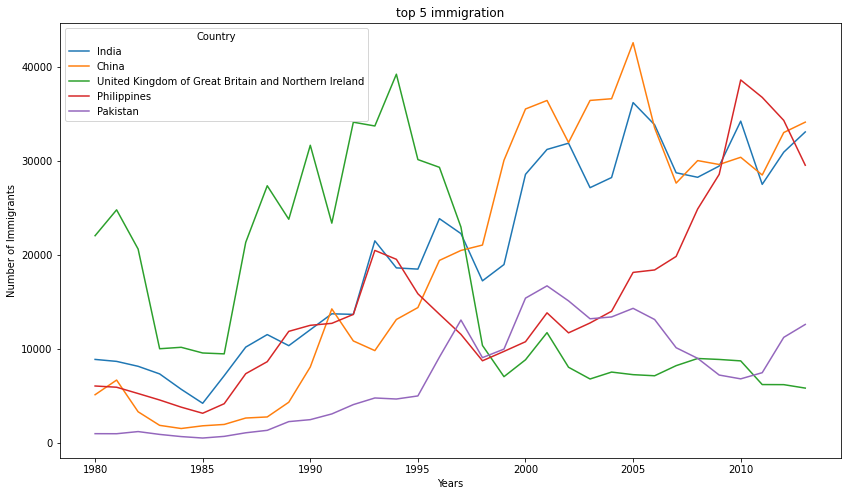

In [63]:
top5.plot(kind = 'line',figsize=(14,8))
plt.title('top 5 immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

# Area Plot

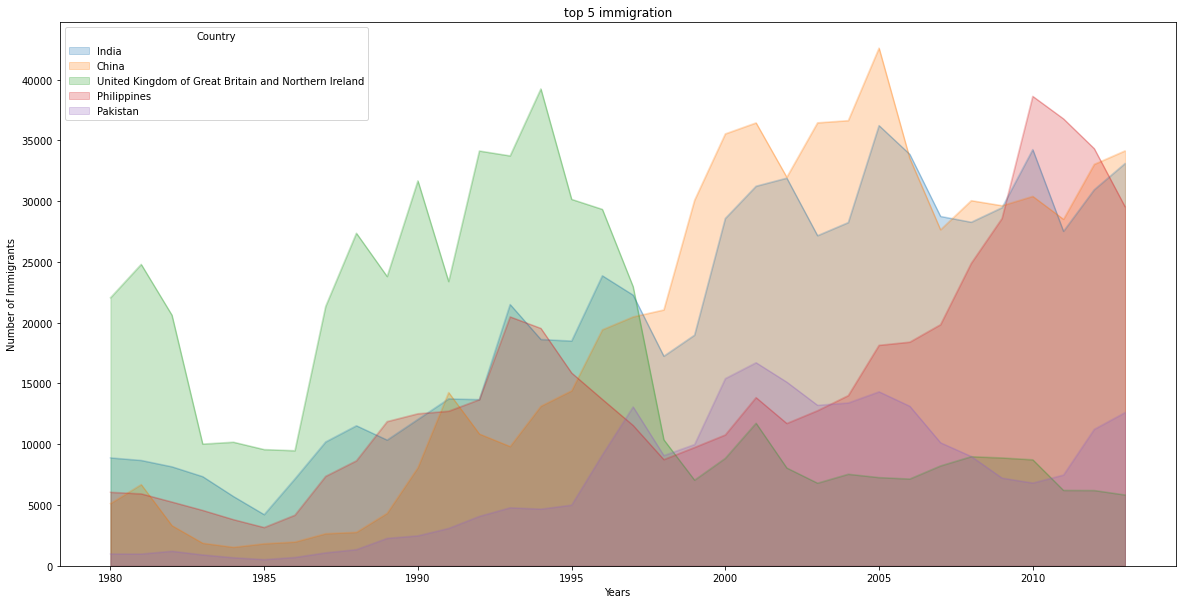

In [64]:
top5.plot(kind = 'area',
          stacked = False,
          alpha = 0.25,   #transparency
          figsize=(20,10))
plt.title('top 5 immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [65]:
df_can.sort_values(by='Total',ascending=True,axis=0,inplace=True)

In [66]:
least5 = df_can.head(5)
least5 = least5[years].transpose()
least5.index = least5.index.map(int)

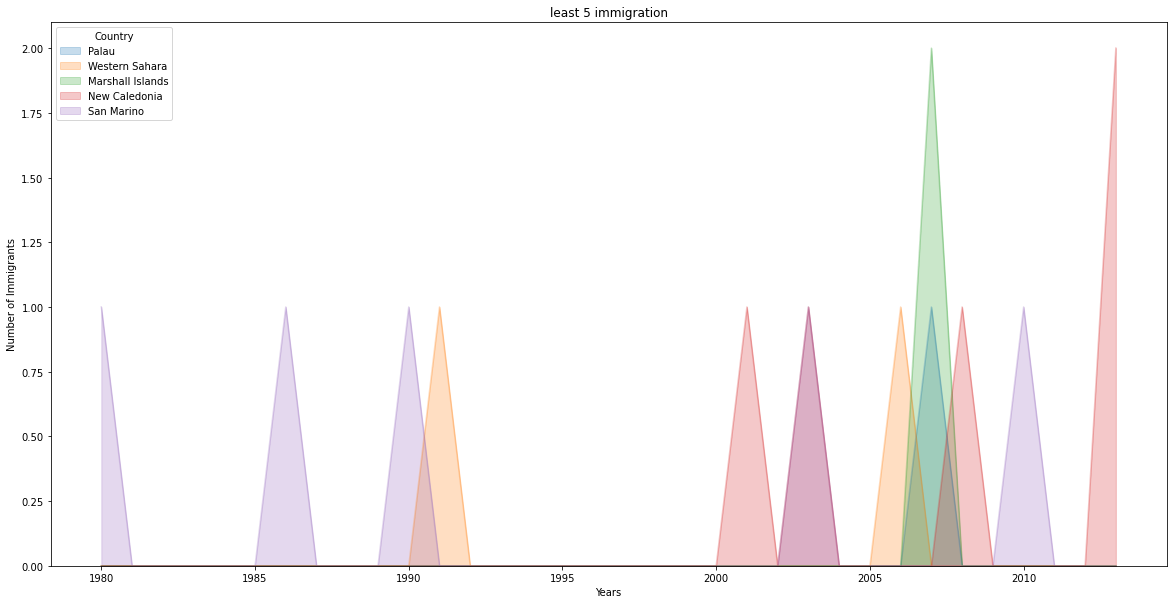

In [67]:
least5.plot(kind = 'area',
          stacked = False,
          alpha = 0.25,   #transparency
          figsize=(20,10))
plt.title('least 5 immigration')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

# Histogram

A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [68]:
data = df_can['2013']

In [69]:
print(data)

Country
Palau                                                       0
Western Sahara                                              0
Marshall Islands                                            0
New Caledonia                                               2
San Marino                                                  0
                                                        ...  
Pakistan                                                12603
Philippines                                             29544
United Kingdom of Great Britain and Northern Ireland     5827
China                                                   34129
India                                                   33087
Name: 2013, Length: 195, dtype: int64


In [70]:
count, bin_edges = np.histogram(data)
print(count)  #no. of countries in each migration range
print(bin_edges)  #ranges of migration population

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


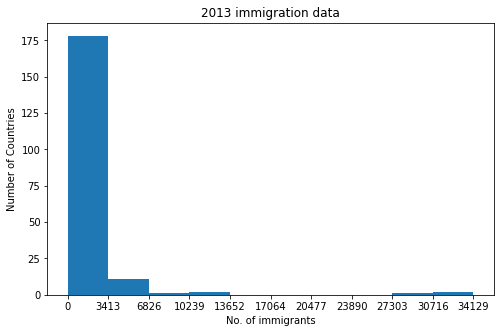

In [72]:
data.plot(kind='hist', figsize=(8,5), xticks = bin_edges)
plt.title('2013 immigration data')
plt.xlabel('No. of immigrants')
plt.ylabel('Number of Countries')
plt.show()

What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [77]:
temp = df_can.loc[['Denmark','Norway','Sweden'],years]
temp = temp.transpose()
temp.index = temp.index.map(int)

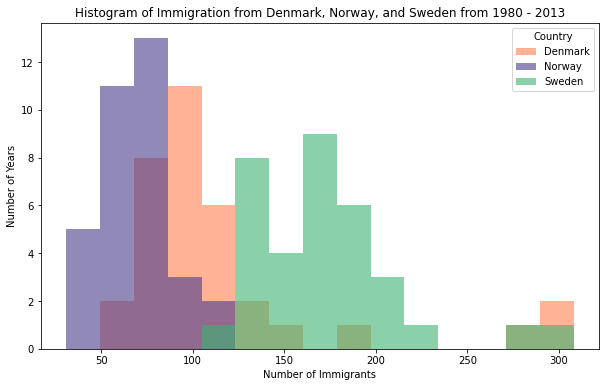

In [85]:
count,bin_edge = np.histogram(temp,15)  #make 15 partitions
temp.plot(kind='hist',
          figsize=(10,6),
           #stacked = True for no overlapping
          bins = 15,
          alpha = 0.6,
          color=['coral','darkslateblue','mediumseagreen']
         )
plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Graph

The 2008 - 2011 Icelandic Financial Crisis was a major economic and political event in Iceland. Relative to the size of its economy, Iceland's systemic banking collapse was the largest experienced by any country in economic history. The crisis led to a severe economic depression in 2008 - 2011 and significant political unrest.

Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [86]:
iceland = df_can.loc['Iceland',years]

In [87]:
iceland = iceland.transpose()

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

s: str, the text of annotation.

xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).

xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).

xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).

arrowprops: Takes a dictionary of properties to draw the arrow:

arrowstyle: Specifies the arrow style, '->' is standard arrow.

connectionstyle: Specifies the connection type. arc3 is a straight line.

color: Specifies color of arrow.

lw: Specifies the line width.

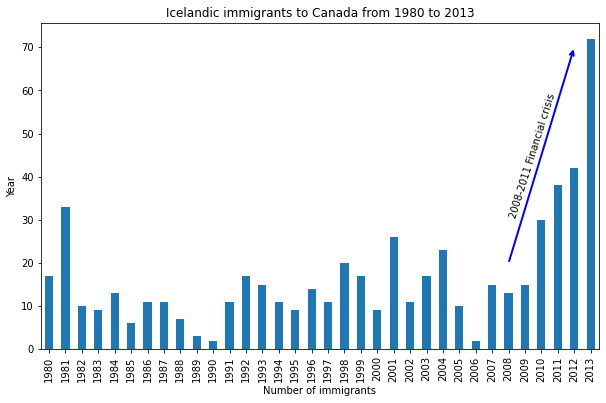

In [88]:
iceland.index = iceland.index.map(int)
iceland.plot(kind = 'bar',figsize=(10,6))
plt.ylabel('Year')
plt.xlabel('Number of immigrants') 
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

#Annoate arrow
plt.annotate('',#text at base of arrown
             xy = (32,70),  #arrow head location
             xytext=(28,20),   #arrow base location
             xycoords='data',    #using coords of object being annotated
             arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw=2)
             )
#Annoate text
plt.annotate('2008-2011 Financial crisis',  #text
            xy = (28,30),   #start of text
            rotation = 72.5,   #rotate the text
            va = 'bottom',   #bottom aligned
            ha = 'left',     #left aligned
            )
plt.show()

# Pie Chart

In [89]:
continents = df_can.groupby('Continent',axis=0).sum()
continents

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


Let's use a pie chart to explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

In [90]:
continents = continents['Total']

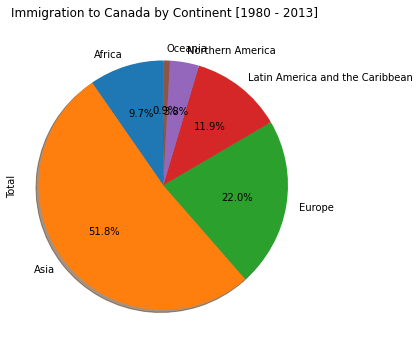

In [91]:
continents.plot(kind = 'pie',
                shadow = True,
                figsize=(5,6),
                startangle=90,
                autopct='%1.1f%%' #shows percentage in each sector
               )
plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

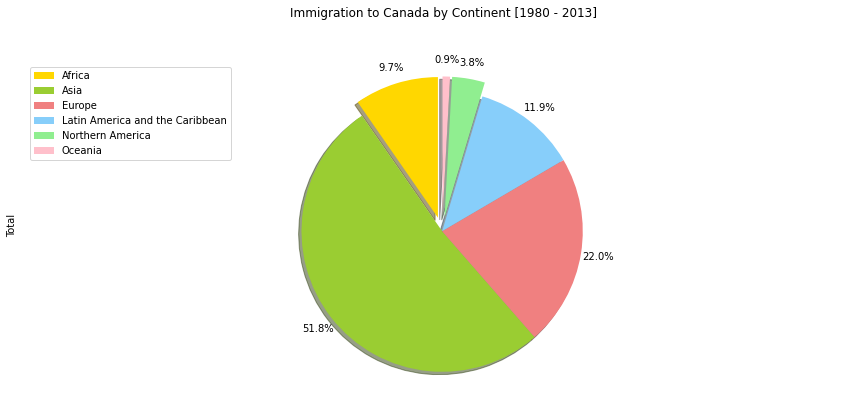

In [92]:
#improved and clearer graph
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']

continents.plot(kind = 'pie',
               figsize = (15,6),
               autopct = '%1.1f%%',
               startangle = 90,
               shadow = True,
               labels = None,
               pctdistance=1.12,
               colors = colors_list,
               explode = explode_list
              )
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 
plt.axis('equal')

plt.legend(labels=continents.index,loc='upper left')#adding legends

plt.show()

# Box Plots

Let's plot the box plot for the Japanese immigrants between 1980 - 2013.

In [ ]:
japan = df_can.loc['Japan',years]
japan

In [94]:
japan = japan.transpose()

In [ ]:
japan

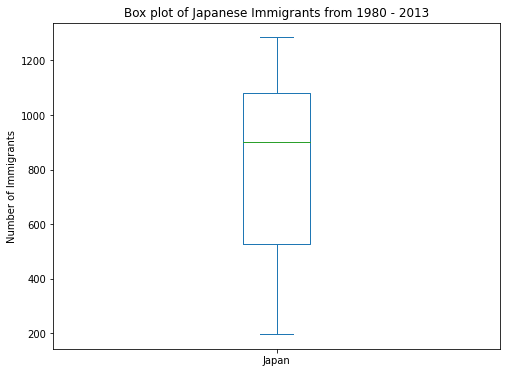

In [95]:
japan.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

Question: Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. With subplots, we usually work with the artist layer instead of the scripting layer.

Typical syntax is :

    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
Where

nrows and ncols are used to notionally split the figure into (nrows * ncols) sub-axes,
plot_number is used to identify the particular subplot that this function is to create within the notional grid. 

plot_number starts at 1, increments across rows first and has a maximum of nrows * ncols as shown below.

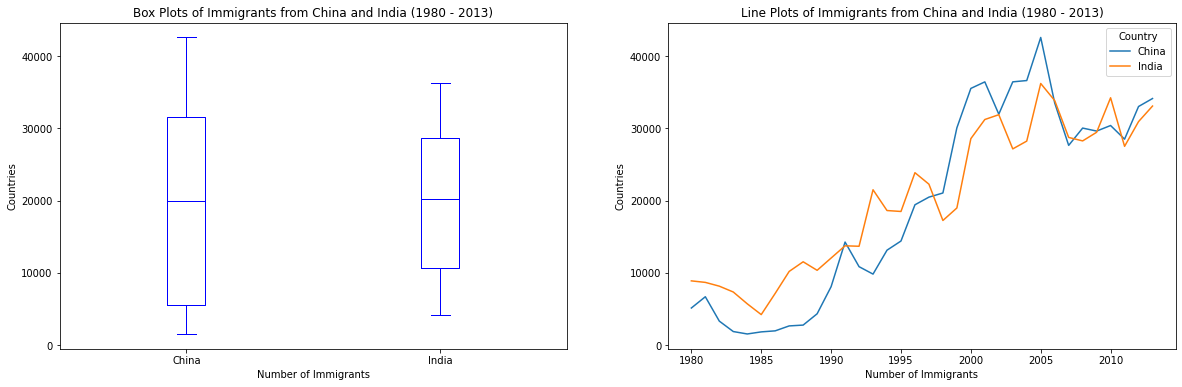

In [96]:
fig = plt.figure()

fig1 = fig.add_subplot(1,2,1)
fig2 = fig.add_subplot(1,2,2)

compare.plot(kind='box',
             color='blue',
             figsize=(20,6),
             ax=fig1)
fig1.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
fig1.set_xlabel('Number of Immigrants')
fig1.set_ylabel('Countries')

compare.plot(kind='line',
             figsize=(20,6),
             ax = fig2)
fig2.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
fig2.set_xlabel('Number of Immigrants')
fig2.set_ylabel('Countries')

plt.show()

Question: Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [97]:
top15 = df_can.sort_values(by='Total',ascending=False,axis=0).head(15)

In [98]:
top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [99]:
year80s = list(map(str, range(1980, 1990)))
year90s = list(map(str, range(1990, 2000)))
year20s = list(map(str, range(2000, 2010)))

In [100]:
df_80s = top15.loc[:,year80s]
df_90s = top15.loc[:,year90s]
df_20s = top15.loc[:,year20s]

In [101]:
df_80s

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Country,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979


In [102]:
df_80s = df_80s.sum(axis=1)
df_90s = df_90s.sum(axis=1)
df_20s = df_20s.sum(axis=1)

In [103]:
df_80s

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
United States of America                                 76824
Iran (Islamic Republic of)                               21477
Sri Lanka                                                14796
Republic of Korea                                        16259
Poland                                                   57602
Lebanon                                                  24918
France                                                   17137
Jamaica                                                  34328
Viet Nam                                                 30638
Romania                                                   7613
dtype: int64

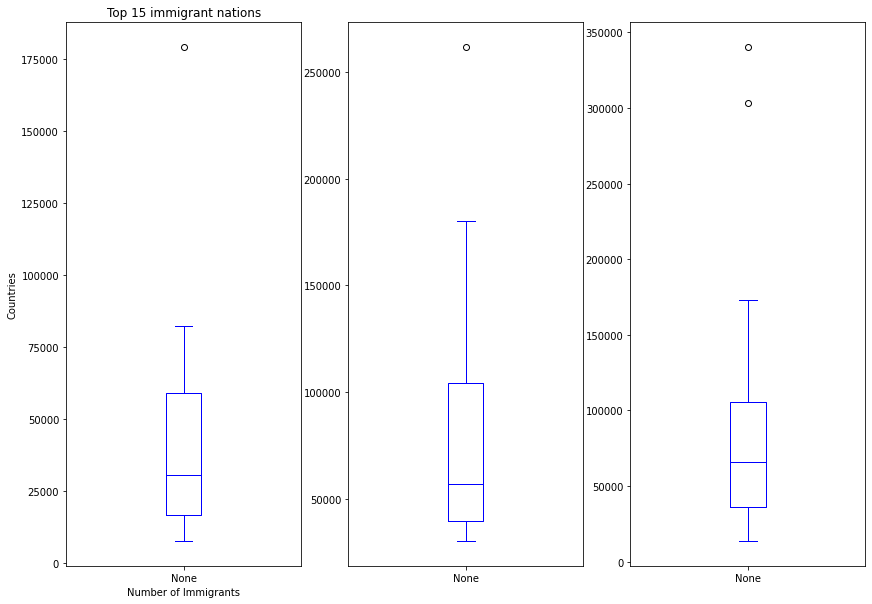

In [104]:
fig = plt.figure()

fig80s = fig.add_subplot(1,15,1)
fig90s = fig.add_subplot(1,15,2)
fig20s = fig.add_subplot(1,15,3)

df_80s.plot(kind='box',
            figsize=(75,10),
            color='blue',
            ax=fig80s)
df_90s.plot(kind='box',
            figsize=(75,10),
            color='blue',
            ax=fig90s)
df_20s.plot(kind='box',
            figsize=(75,10),
            color='blue',
            ax=fig20s)

fig80s.set_title('Top 15 immigrant nations')
fig80s.set_xlabel('Number of Immigrants')
fig80s.set_ylabel('Countries')

plt.show()

In [105]:
new_df = pd.DataFrame({'1980s':df_80s,
                      '1990s':df_90s,
                      '2000s':df_20s}
                     )

In [106]:
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


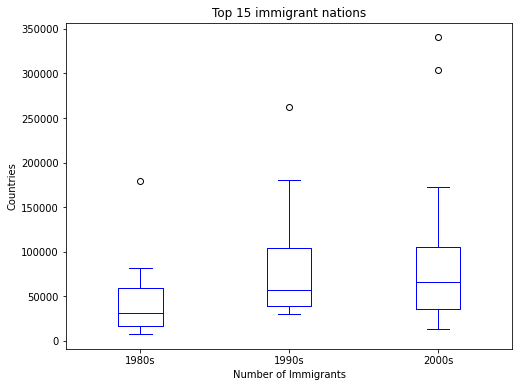

In [107]:
new_df.plot(kind='box',
           figsize=(8,6),
           color = 'blue'
           )

plt.title('Top 15 immigrant nations')
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')

plt.show()

# Scatter plot

Using a scatter plot, let's visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

In [108]:
trend = pd.DataFrame(df_can[years].sum(axis=0))

In [ ]:
trend

In [111]:
trend.index = trend.index.map(int)

In [112]:
trend.reset_index(inplace=True)
trend.columns=['year','pop']

In [113]:
trend

,year,pop
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


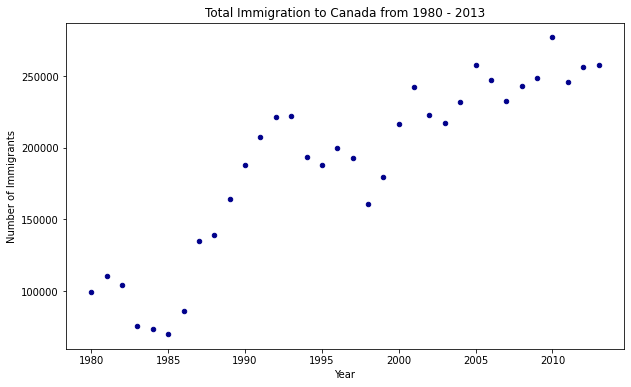

In [114]:
trend.plot(kind='scatter',
           x='year',
           y='pop',
           color='darkblue',
           figsize=(10,6)
          )
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

To plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

In [115]:
x,y = trend['year'],trend['pop']

In [116]:
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

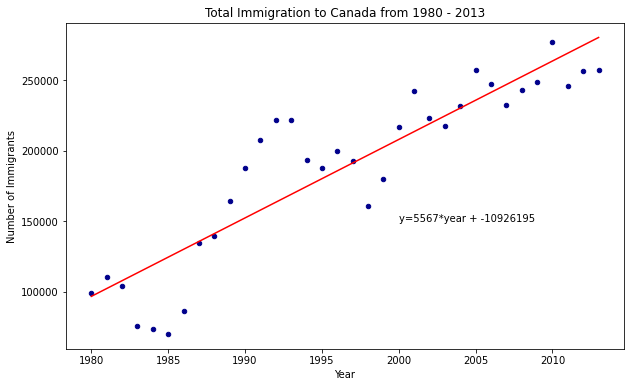

In [117]:
trend.plot(kind='scatter',
           x='year',
           y='pop',
           color='darkblue',
           figsize=(10,6)
          )
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x,fit[0]*x + fit[1],color='red')
plt.annotate('y={0:.0f}*year + {1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

Question: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

In [118]:
migration = pd.DataFrame(temp.transpose().sum(axis=0))
migration.index = migration.index.map(int)

In [ ]:
migration.reset_index(inplace=True)
migration.columns=['year','pop']
migration

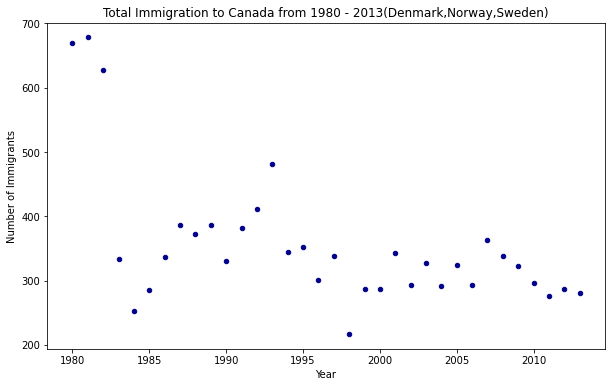

In [120]:
migration.plot(kind='scatter',
           x='year',
           y='pop',
           color='darkblue',
           figsize=(10,6)
          )
plt.title('Total Immigration to Canada from 1980 - 2013(Denmark,Norway,Sweden)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

# Bubble plot 

A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. In maplotlib, we can pass in an array or scalar to the parameter s to plot(), that contains the weight of each point.

Let's start by analyzing the effect of Argentina's great depression.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

Let's analyze the effect of this crisis, and compare Argentina's immigration to that of it's neighbour Brazil. Let's do that using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.

In [121]:
depress = df_can[years].transpose()
depress.index = depress.index.map(int)
depress.index.name='Year'
depress.reset_index(inplace=True)
depress.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


In [122]:
brazil = depress['Brazil']
norm_brazil = (brazil-brazil.min())/(brazil.max()-brazil.min())

In [123]:
argentina = depress['Argentina']
norm_argentina = (argentina-argentina.min())/(argentina.max()-argentina.min())

We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. 

Therefore, we will:
multiply weights by 2000 to scale it up on the graph, and,

add 10 to compensate for the min value (which has a 0 weight and therefore scale with  ×2000 ).

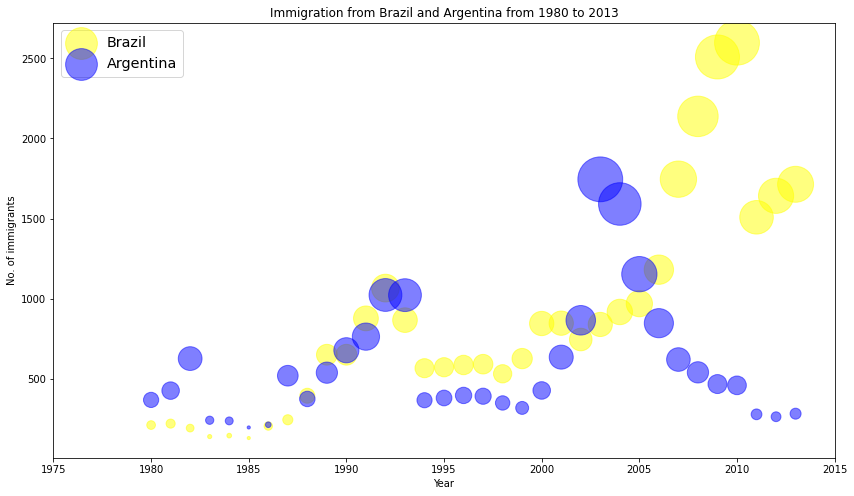

In [124]:
fig1 = depress.plot(kind='scatter',
                  x = 'Year',
                  y = 'Brazil',
                  figsize=(14,8),
                  alpha = 0.5,
                  color='yellow',
                  s=norm_brazil*2000+10,
                  xlim=(1975,2015)
                 )

fig2 = depress.plot(kind='scatter',
                  x = 'Year',
                  y = 'Argentina',
                  figsize=(14,8),
                  alpha = 0.5,
                  color='blue',
                  s=norm_argentina*2000+10,
                  ax=fig1
                 )

fig1.set_ylabel('No. of immigrants')
fig1.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
fig1.legend(['Brazil','Argentina'],loc='upper left',fontsize='x-large')

In [125]:
type(brazil)

pandas.core.series.Series

In [126]:
from PIL import Image

# Waffle Chart

In [127]:
total_values = df_can['Total'].sum()
category_proportions = df_can['Total']/total_values  #calculate proportions

pd.DataFrame({'Category Proportion': category_proportions})

,Category Proportion
Country,
Palau,1.560269e-07
Western Sahara,3.120537e-07
Marshall Islands,3.120537e-07
New Caledonia,7.801343e-07
San Marino,7.801343e-07
...,...
Pakistan,3.769609e-02
Philippines,7.979073e-02
United Kingdom of Great Britain and Northern Ireland,8.604881e-02


# Word Clouds

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [128]:
from wordcloud import WordCloud,STOPWORDS

In [129]:
import urllib

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, let's use the stopwords that we imported from word_cloud. We use the function set to remove any redundant stopwords.

In [130]:
stopwords = set(STOPWORDS)

In [131]:
alice_wc = WordCloud(background_color='white',
                    max_words=2000,
                    stopwords=stopwords)

alice_wc.generate(alice_novel)

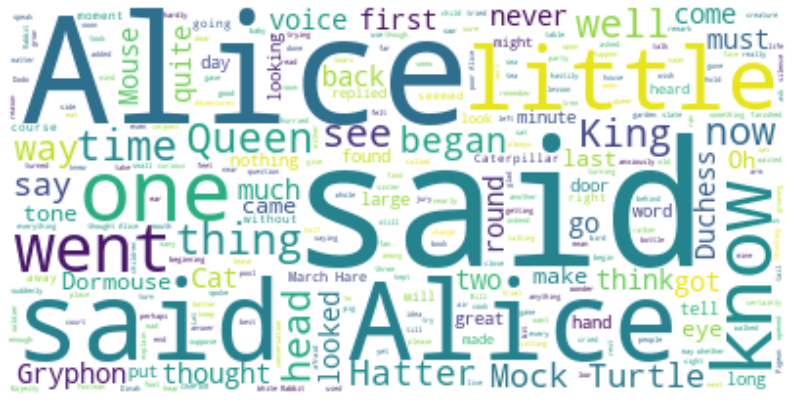

In [132]:
fig = plt.figure(figsize=(14, 18))
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

said isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.

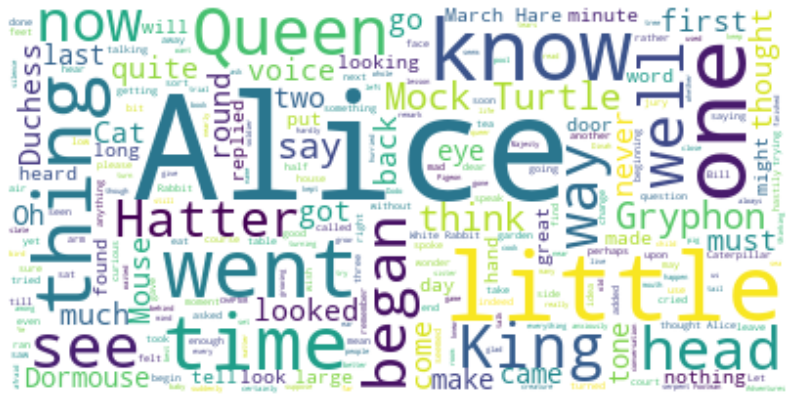

In [133]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [134]:
# save mask to alice_mask
alice_mask = np.array(Image.open(urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/images/alice_mask.png')))

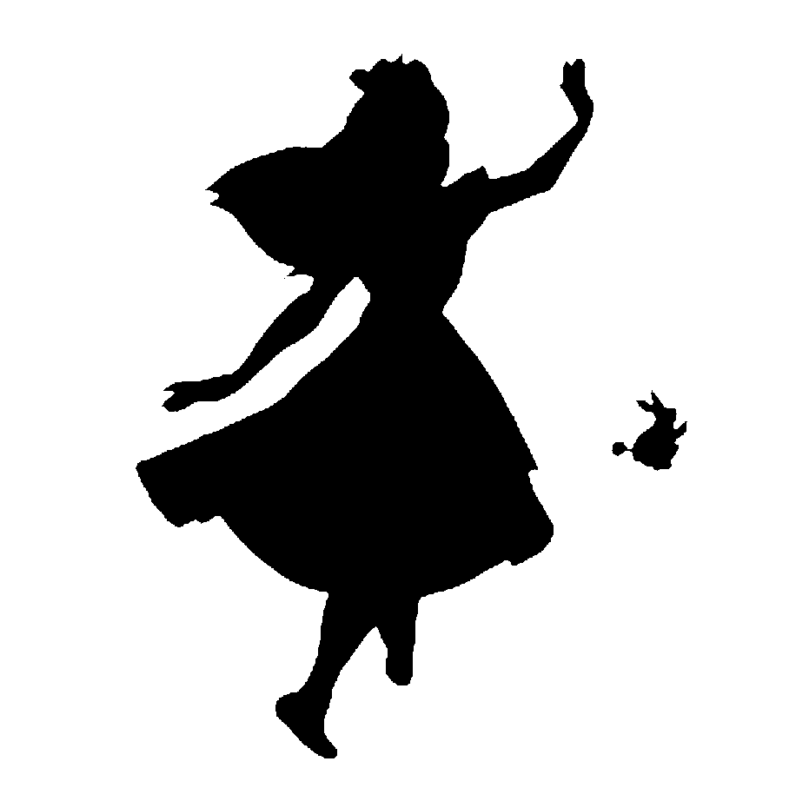

In [135]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

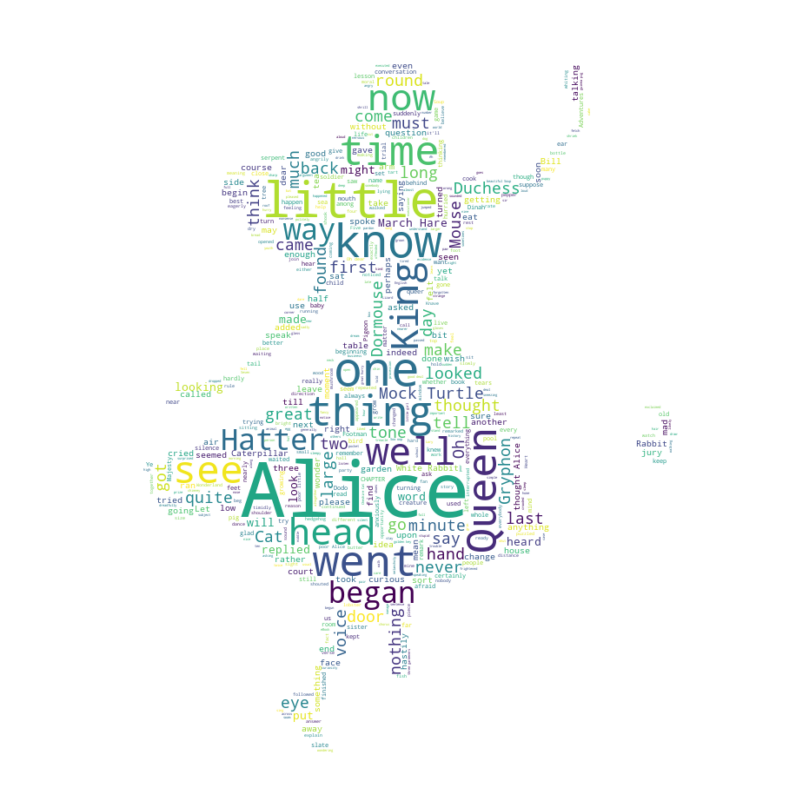

In [136]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots

In [137]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [138]:
import seaborn as sns

In [139]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

In [140]:
df_tot.head(5)

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [141]:
df_tot.index = df_tot.index.map(float)

In [142]:
df_tot.reset_index(inplace=True)

In [143]:
df_tot.columns = ['years','total']
df_tot.head(5)

,years,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<AxesSubplot:xlabel='years', ylabel='total'>

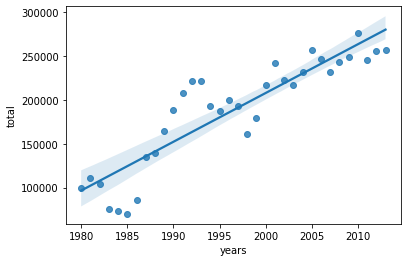

In [144]:
sns.regplot(x='years',y='total',data=df_tot)

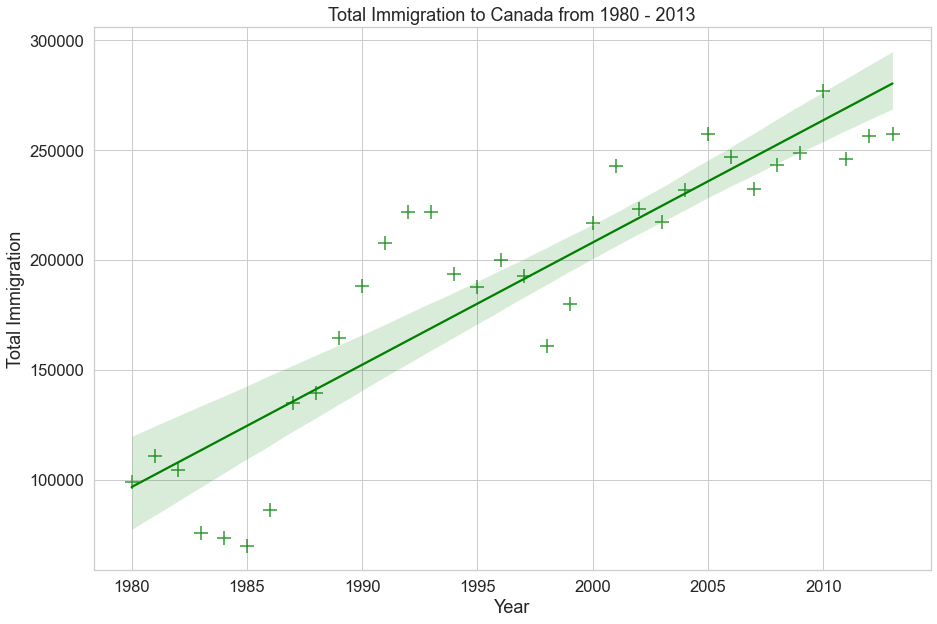

In [145]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='years', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')
plt.show()

# Introduction to Folium

In [146]:
!pip3 install folium


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import folium

In [148]:
world_map = folium.Map()
world_map

In [149]:
world_map = folium.Map(location=[15.3173, 75.7139], zoom_start=6, tiles='Stamen Toner') #various styles

# display map
world_map

# Maps with Markers

In [150]:
df_incidents = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [151]:
df_incidents = df_incidents.iloc[:100,:]
df_incidents.head(5)

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [152]:
#add markers

incidents = folium.map.FeatureGroup()
for lat,lng in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
       folium.features.CircleMarker(
         [lat,lng],
          radius=5,
          colour='red',
          fill = True,
          fill_color='red',
          fill_opacity=0.6
       )
    )
latitude = 37.77
longitude = -122.42    
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map.add_child(incidents)